Yelp Reviews of Restaurants in New Orleans - Data Exploration and Sentiment Analysis

In [ ]:
import pandas as pd

In [ ]:
df_yelp_business = pd.read_csv('/content/business.csv')
df_yelp_business.head(3)

,,,,lse,"'casual': False}""""",'RestaurantsPriceRange2': '2',"'BusinessParking': """"{'garage': False",'street': False,'validated': False,'lot': False,"'valet': False}""""","'HasTV': 'True'}""","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0', 'Sunday': '11:0-20:0'}","['Restaurants', ' Mexican']"
93311,BDgBi2fq14nNYFktoJV4lQ,Supercuts,"141 Bridgeton Pike, Mullica Hill Plaza, Mullica Hill Plaza",Mullica Hill,NJ,08062,39.724482,-75.219724,2.0,9,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Hair Salons, Beauty & Spas, Hair Stylists, Sho...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-20:0', '...","['Hair Salons', ' Beauty & Spas', ' Hair Styli..."
93312,8TJSbuy8qmq-_2D0Kb1x4A,Bicycle World,701 Jefferson Hwy,Jefferson,LA,70121,29.965622,-90.137542,4.5,23,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bikes, Shopping, Sporting Goods","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...","['Bikes', ' Shopping', ' Sporting Goods']"
93313,yAxmPYbC6a0jAwdm_WzDhA,Café Zupas,600 North Milwaukee St,Boise,ID,83704,43.610531,-116.283833,3.5,98,1,"{'RestaurantsTableService': 'False', 'NoiseLev...","Soup, Restaurants, Sandwiches, American (New),...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","['Soup', ' Restaurants', ' Sandwiches', ' Amer..."


In [ ]:
df_yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57035 entries, (np.int64(93311), 'BDgBi2fq14nNYFktoJV4lQ', 'Supercuts', '141 Bridgeton Pike, Mullica Hill Plaza, Mullica Hill Plaza') to (np.int64(150345), 'jV_XOycEzSlTx-65W906pg', 'Sic Ink', '238 Apollo Beach Blvd')
Data columns (total 12 columns):
 #   Column                                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                                     --------------  -----  
 0   lse                                                                                                                                                                        57035 non-null  object 
 1    'casual': False}""                                                                           

In [ ]:
df_yelp_business.describe()

,"'BusinessParking': """"{'garage': False",'street': False,'validated': False,'lot': False,"'valet': False}"""""
count,57035.000000,57035.000000,57035.000000,57035.000000,57035.000000
mean,36.676217,-89.354073,3.594460,45.032980,0.795897
std,5.864132,14.944465,0.975503,130.728739,0.403048
min,27.558259,-120.092497,1.000000,5.000000,0.000000
25%,32.190197,-90.359942,3.000000,8.000000,1.000000
50%,38.781231,-86.118979,3.500000,15.000000,1.000000
75%,39.953772,-75.424094,4.500000,37.000000,1.000000
max,53.649743,-73.200457,5.000000,7568.000000,1.000000


In [ ]:
#Filter states with businesses over 1000
state_business_count = df_yelp_business['state'].value_counts()
state_business_over_1000 = state_business_count[state_business_count > 1000]
review_count_threshold = 1000
df_state_business_sample = df_yelp_business[(df_yelp_business['state'].isin(state_business_over_1000.index)) & (df_yelp_business['review_count'] > review_count_threshold)]
df_state_business_sample.head(3)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,split_categories
141,141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...","['Live/Raw Food', ' Restaurants', ' Seafood', ..."
181,181,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","['Venues & Event Spaces', ' Performing Arts', ..."
957,957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30...","['Bars', ' Breakfast & Brunch', ' Restaurants'..."


In [ ]:
#Considering states with more than 1000 businesses
df_state_business_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 141 to 149325
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        315 non-null    int64  
 1   business_id       315 non-null    object 
 2   name              315 non-null    object 
 3   address           315 non-null    object 
 4   city              315 non-null    object 
 5   state             315 non-null    object 
 6   postal_code       315 non-null    object 
 7   latitude          315 non-null    float64
 8   longitude         315 non-null    float64
 9   stars             315 non-null    float64
 10  review_count      315 non-null    int64  
 11  is_open           315 non-null    int64  
 12  attributes        315 non-null    object 
 13  categories        315 non-null    object 
 14  hours             315 non-null    object 
 15  split_categories  315 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory u

In [ ]:
df_state_business_sample['review_count'].value_counts()


,count
review_count,
1368,4
1210,4
1140,3
2406,2
1094,2
...,...
1466,1
1489,1
1301,1


In [ ]:
#Reset index
df_state_business_sample = df_state_business_sample.reset_index(drop=True)
df_state_business_sample = df_state_business_sample.drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
#Find primary category from the categories list of each restaurant
df_state_business_sample.loc[:,'primary_category'] = df_state_business_sample['categories'].str.split(',').str[0].str.strip()
df_state_business_sample.head(20)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,split_categories,primary_category
0,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...","['Live/Raw Food', ' Restaurants', ' Seafood', ...",Live/Raw Food
1,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","['Venues & Event Spaces', ' Performing Arts', ...",Venues & Event Spaces
2,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30...","['Bars', ' Breakfast & Brunch', ' Restaurants'...",Bars
3,8uF-bhJFgT4Tn6DTb27viA,District Donuts Sliders Brew,2209 Magazine St,New Orleans,LA,70130,29.929426,-90.077069,4.5,2062,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsRe...","Food, Donuts, Burgers, American (Traditional),...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...","['Food', ' Donuts', ' Burgers', ' American (Tr...",Food
4,UCMSWPqzXjd7QHq7v8PJjQ,Prep & Pastry,2660 N Campbell Ave,Tucson,AZ,85719,32.255528,-110.943492,4.5,2126,1,"{'Alcohol': ""u'full_bar'"", 'BikeParking': 'Tru...","Restaurants, Cocktail Bars, Bars, Comfort Food...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '...","['Restaurants', ' Cocktail Bars', ' Bars', ' C...",Restaurants
5,pym7c6ZFEtmoH16xN2ApBg,Katie's Restaurant & Bar,3701 Iberville St,New Orleans,LA,70119,29.973094,-90.095914,4.5,1289,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Bars, Nightlife, American (Tradit...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","['Restaurants', ' Bars', ' Nightlife', ' Ameri...",Restaurants
6,EQ-TZ2eeD_E0BHuvoaeG5Q,Milktooth,534 Virginia Ave,Indianapolis,IN,46203,39.759169,-86.146494,4.0,1379,1,"{'GoodForKids': 'True', 'Alcohol': ""u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',...","['Beer', ' Wine & Spirits', ' Cafes', ' Coffee...",Beer
7,TDKBPcViJQDMrdUm6a9XZA,The Depot Craft Brewery Distillery,325 E 4th St,Reno,NV,89512,39.531107,-119.809618,4.0,1245,1,"{'Smoking': ""u'no'"", 'Alcohol': ""u'full_bar'"",...","Food, Restaurants, Brasseries, Breweries, Dist...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ...","['Food', ' Restaurants', ' Brasseries', ' Brew...",Food
8,SJIQFKTW6uUsOo29w9IHxw,Mambo's,411 Bourbon St,New Orleans,LA,70130,29.956668,-90.067651,4.0,1223,1,"{'Corkage': 'False', 'GoodForKids': 'True', 'C...","Cocktail Bars, Soul Food, Nightlife, Food, Des...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...","['Cocktail Bars', ' Soul Food', ' Nightlife', ...",Cocktail Bars
9,JvawJ9bSr22xn4R9oLvl_w,Desire Oyster Bar,300 Bourbon St,New Orleans,LA,70130,29.955527,-90.068154,4.0,1084,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Southern, Event Planning & Services, Restauran...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...","['Southern', ' Event Planning & Services', ' R...",Southern


In [ ]:
df_state_business_sample['primary_category'].value_counts(ascending=False).head(50)

,count
primary_category,
Restaurants,53
Seafood,18
Nightlife,15
American (New),15
Food,15
Cajun/Creole,14
Bars,13
Breakfast & Brunch,13
Sandwiches,11


In [ ]:
df_state_business_sample['city'].value_counts().head(40)

,count
city,
New Orleans,88
Philadelphia,66
Nashville,34
Santa Barbara,28
Tampa,21
Reno,15
Saint Louis,11
Tucson,8
Indianapolis,7


In [ ]:
#City with highest review count
total_reviews = df_state_business_sample[df_state_business_sample['city'] == 'New Orleans']['review_count'].sum()
total_reviews

np.int64(185184)

In [ ]:
#City with highest businesses
total_business = df_state_business_sample[df_state_business_sample['city'] == 'New Orleans']['business_id'].count()
total_business

np.int64(88)

###Reviews Data

In [ ]:
df_reviews_2 = pd.read_csv('/content/chunk_2_processed.csv')
df_reviews_2.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,aVCjon0LtLgZFt-VhfNyXQ,vfQ1_fDr1noBW4ZUi2Nvwg,tgWxnsQ8XIFdGeOKWhz1uQ,1.0,3,0,0,Never even got to go to the place. I was recom...,2014-06-24 23:41:20
1,2BBiMCxu_jw_l_Pt75CLIA,BzN-JRkAeKPU4PWn0gDRWg,sLgnx_WFCjEoPsS6NwU70Q,5.0,1,0,1,"Sunday breakfast with my girls :) \n\nA ""lite""...",2015-05-07 19:04:17
2,d20iDiHp_h_GlHZzQ3Jr8A,1hWXgcDzfvFmWMpBsXfqHw,46fEorqn2nVbxdclHdHdKg,5.0,0,0,0,"Excellent food, service and atmosphere. Great...",2013-01-01 20:34:48


In [ ]:
df_reviews_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211721 entries, 0 to 211720
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    211721 non-null  object 
 1   user_id      211721 non-null  object 
 2   business_id  211721 non-null  object 
 3   stars        211721 non-null  float64
 4   useful       211721 non-null  int64  
 5   funny        211721 non-null  int64  
 6   cool         211721 non-null  int64  
 7   text         211721 non-null  object 
 8   date         211720 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.5+ MB


In [ ]:
df_reviews_3 = pd.read_csv('/content/chunk_3_trimmed.csv')
df_reviews_3.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,FzUIuyEv0-IGDD-HgNzMFw,ygkSutTb8BXT2FWet7HB4w,PVqNBGihp6yNv6HTQf7CjA,5.0,0,0,0,I live nearby and was tired of the same old na...,2018-08-01 13:18:03
1,X4pf__trHaFzzYCQnQNtSg,WDms6ne7odON8vtdL-b-xA,STtVemevd30WoiZWn_taiQ,5.0,0,0,0,This Pollo Tropical is great! Quick and friend...,2021-04-11 21:30:56
2,OaGJJMW1Bk2XD2yfmMlffg,ahgaIIujY6R8HsEJfRnLUw,MfyUK58sdUokMdIZNdem0w,1.0,0,1,0,Not happy with this place at all. Saw somethin...,2020-12-01 20:46:21


In [ ]:
df_reviews_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    300000 non-null  object 
 1   user_id      300000 non-null  object 
 2   business_id  300000 non-null  object 
 3   stars        300000 non-null  float64
 4   useful       300000 non-null  int64  
 5   funny        300000 non-null  int64  
 6   cool         300000 non-null  int64  
 7   text         300000 non-null  object 
 8   date         300000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 20.6+ MB


In [ ]:
df_reviews = pd.concat([df_reviews_2, df_reviews_3])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511721 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    511721 non-null  object 
 1   user_id      511721 non-null  object 
 2   business_id  511721 non-null  object 
 3   stars        511721 non-null  float64
 4   useful       511721 non-null  int64  
 5   funny        511721 non-null  int64  
 6   cool         511721 non-null  int64  
 7   text         511721 non-null  object 
 8   date         511720 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 39.0+ MB


In [ ]:
#Join df_state_business_sample and df_reviews
df_state_business_reviews = pd.merge(df_state_business_sample, df_reviews, on='business_id')
df_state_business_reviews.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,split_categories,primary_category,review_id,user_id,stars_y,useful,funny,cool,text,date
0,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,...,"['Live/Raw Food', ' Restaurants', ' Seafood', ...",Live/Raw Food,6jHUohLjbz7Sfh_ySQbhIA,bk6W1RVj66gY1E1GTlr-tw,5.0,0,0,0,Excellent shellfish and fish. We get the whole...,2016-02-08 22:36:45
1,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,...,"['Live/Raw Food', ' Restaurants', ' Seafood', ...",Live/Raw Food,5Gp6VEJFC57vHbuI0DGGhw,aFFK8Wqshy-YR6bskmlXzA,5.0,0,0,0,This is my absolute favorite place to eat in S...,2018-03-03 22:53:48
2,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,...,"['Live/Raw Food', ' Restaurants', ' Seafood', ...",Live/Raw Food,ykDbok7TYzgOp3Fx8Y934A,ErUSfIUHEiATEyHGd-h6jQ,4.0,0,0,0,This is the place to get seasonal fresh seafoo...,2011-11-23 05:34:41


In [ ]:
df_state_business_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42895 entries, 0 to 42894
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       42895 non-null  object 
 1   name              42895 non-null  object 
 2   address           42895 non-null  object 
 3   city              42895 non-null  object 
 4   state             42895 non-null  object 
 5   postal_code       42895 non-null  object 
 6   latitude          42895 non-null  float64
 7   longitude         42895 non-null  float64
 8   stars_x           42895 non-null  float64
 9   review_count      42895 non-null  int64  
 10  is_open           42895 non-null  int64  
 11  attributes        42895 non-null  object 
 12  categories        42895 non-null  object 
 13  hours             42895 non-null  object 
 14  split_categories  42895 non-null  object 
 15  primary_category  42895 non-null  object 
 16  review_id         42895 non-null  object

In [ ]:
#Reviews count of each city
df_state_business_reviews['city'].value_counts(ascending=False).head(50)

,count
city,
New Orleans,12562
Philadelphia,9160
Nashville,4544
Santa Barbara,3338
Saint Louis,2723
Indianapolis,2215
Reno,2123
Saint Petersburg,1637
Tucson,1205


In [ ]:
#Download state business reviews into csv file
df_state_business_reviews.to_csv('state_business_reviews.csv', index=False)

###New Orleans Restaurant Reviews


In [ ]:
#Analyzing only one city reviews from New Orleans
df_New_Orleans_business_reviews = df_state_business_reviews[df_state_business_reviews['city'] == 'New Orleans']
df_New_Orleans_business_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12562 entries, 1813 to 41262
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       12562 non-null  object 
 1   name              12562 non-null  object 
 2   address           12562 non-null  object 
 3   city              12562 non-null  object 
 4   state             12562 non-null  object 
 5   postal_code       12562 non-null  object 
 6   latitude          12562 non-null  float64
 7   longitude         12562 non-null  float64
 8   stars_x           12562 non-null  float64
 9   review_count      12562 non-null  int64  
 10  is_open           12562 non-null  int64  
 11  attributes        12562 non-null  object 
 12  categories        12562 non-null  object 
 13  hours             12562 non-null  object 
 14  split_categories  12562 non-null  object 
 15  primary_category  12562 non-null  object 
 16  review_id         12562 non-null  object 


In [ ]:
df_New_Orleans_business_reviews['primary_category'].value_counts()

,count
primary_category,
Restaurants,1603
German,1534
Cajun/Creole,1486
Cocktail Bars,929
Seafood,903
Breakfast & Brunch,829
Food,783
Bars,723
Vegetarian,680


In [ ]:
df_New_Orleans_business_reviews['name'].value_counts()

,count
name,
Luke,1534
Drago's Seafood Restaurant,1065
Mambo's,929
Jacques-Imo's Cafe,903
Cafe Fleur De Lis,829
District Donuts Sliders Brew,783
Muriel's Jackson Square,745
Creole House Restaurant & Oyster Bar,741
Mr. B's Bistro,723


In [ ]:
df_restaurants = df_New_Orleans_business_reviews[df_New_Orleans_business_reviews['primary_category'] == 'Restaurants']
df_restaurants['name'].value_counts()

,count
name,
Drago's Seafood Restaurant,1065
Katie's Restaurant & Bar,538


In [ ]:
#Find Sentiment of each review using nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Add sentiment analysis results to the DataFrame
df_New_Orleans_business_reviews.loc[:,'sentiment'] = df_New_Orleans_business_reviews['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_New_Orleans_business_reviews.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,primary_category,review_id,user_id,stars_y,useful,funny,cool,text,date,sentiment
1813,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,Bars,fwRIMnIUkRI_wHY6BDbn5w,0Tv2dl2O0TEQD-VGbPqwug,5.0,0,0,0,We went here last night for our first dinner i...,2014-04-16 16:15:12,0.9915
1814,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,Bars,3vYMhApHuq7-G4GQg50wFA,KKSMUvisTGDyu8xeVSeiSA,4.0,0,0,0,"""Amazing BBQ Shrimp""\nReviewed November 21, 20...",2011-12-30 05:01:13,0.9042
1815,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,Bars,8366onhZUqbJIdQknwEZAg,TES0PPhg-9jaFj9v28M0cw,3.0,1,0,0,I am unsure how to rate Mr. B's. We had an 8p...,2014-06-19 04:03:34,0.9398


In [ ]:
#Extract key words from reviews
#Sentiment Analysis with NLTK or spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_keywords(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

df_New_Orleans_business_reviews.loc[:,'keywords'] = df_New_Orleans_business_reviews['text'].apply(extract_keywords)

In [ ]:
df_New_Orleans_business_reviews.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,stars_y,useful,funny,cool,text,date,sentiment,keywords
1813,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,fwRIMnIUkRI_wHY6BDbn5w,0Tv2dl2O0TEQD-VGbPqwug,5.0,0,0,0,We went here last night for our first dinner i...,2014-04-16 16:15:12,0.9915,"[We, our first dinner, New Orleans, It, a 30 m..."
1814,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,3vYMhApHuq7-G4GQg50wFA,KKSMUvisTGDyu8xeVSeiSA,4.0,0,0,0,"""Amazing BBQ Shrimp""\nReviewed November 21, 20...",2011-12-30 05:01:13,0.9042,"[Amazing BBQ Shrimp, 2011\nsolid Bistro, all t..."
1815,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,8366onhZUqbJIdQknwEZAg,TES0PPhg-9jaFj9v28M0cw,3.0,1,0,0,I am unsure how to rate Mr. B's. We had an 8p...,2014-06-19 04:03:34,0.9398,"[I, Mr. B, We, an 8pm reservation, a 40th birt..."


Computing Topic Score and Topic Confidence

In [ ]:
#Trend Detection with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare data for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_New_Orleans_business_reviews['text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Change n_components to the number of topics
lda.fit(dtm)

# Assign dominant topics to reviews
#df_New_Orleans_business_reviews.loc[:,'topic'] = [lda.components_.argmax() for topic in lda.transform(dtm)]
# Get topic distribution for each document
topic_distributions = lda.transform(dtm)

# Assign the dominant topic (highest probability) to each document
df_New_Orleans_business_reviews = df_New_Orleans_business_reviews.copy()

df_New_Orleans_business_reviews['topic'] = topic_distributions.argmax(axis=1)
df_New_Orleans_business_reviews['topic_confidence'] = topic_distributions.max(axis=1)

In [ ]:
df_New_Orleans_business_reviews.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,stars_y,useful,funny,cool,text,date,sentiment,keywords,topic,topic_confidence
1813,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,5.0,0,0,0,We went here last night for our first dinner i...,2014-04-16 16:15:12,0.9915,"[We, our first dinner, New Orleans, It, a 30 m...",0,0.487637
1814,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,4.0,0,0,0,"""Amazing BBQ Shrimp""\nReviewed November 21, 20...",2011-12-30 05:01:13,0.9042,"[Amazing BBQ Shrimp, 2011\nsolid Bistro, all t...",0,0.794391
1815,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,3.0,1,0,0,I am unsure how to rate Mr. B's. We had an 8p...,2014-06-19 04:03:34,0.9398,"[I, Mr. B, We, an 8pm reservation, a 40th birt...",0,0.558862


In [ ]:
df_New_Orleans_business_reviews['topic'].value_counts()

,count
topic,
3,3445
2,3176
0,2593
4,1850
1,1498


In [ ]:
#Sentiment correlation with review stars
correlation = df_New_Orleans_business_reviews['sentiment'].corr(df_New_Orleans_business_reviews['stars_y'])
print(f"Sentiment - review stars Correlation: {correlation:.3f}")

Sentiment - review stars Correlation: 0.546


In [ ]:
#Topic confidence correlation with stars
correlation = df_New_Orleans_business_reviews['sentiment'].corr(df_New_Orleans_business_reviews['stars_x'])
print(f"Sentiment - business stars Correlation: {correlation:.3f}")

Sentiment - business stars Correlation: 0.125


A correlation of 0.546 between sentiment and review count suggests a moderate positive relationship.

In [ ]:
#Read csv file
df_New_Orleans_business_reviews = pd.read_csv('/content/New_Orleans_business_reviews.csv')
df_New_Orleans_business_reviews.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,stars_y,useful,funny,cool,text,date,sentiment,keywords,topic,topic_confidence
0,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,5.0,0,0,0,We went here last night for our first dinner i...,2014-04-16 16:15:12,0.9915,"['We', 'our first dinner', 'New Orleans', 'It'...",0,0.487637
1,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,4.0,0,0,0,"""Amazing BBQ Shrimp""\nReviewed November 21, 20...",2011-12-30 05:01:13,0.9042,"['Amazing BBQ Shrimp', '2011\nsolid Bistro', '...",0,0.794391
2,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,...,3.0,1,0,0,I am unsure how to rate Mr. B's. We had an 8p...,2014-06-19 04:03:34,0.9398,"['I', 'Mr. B', 'We', 'an 8pm reservation', 'a ...",0,0.558862


<Axes: xlabel='sentiment_bin', ylabel='stars_y'>

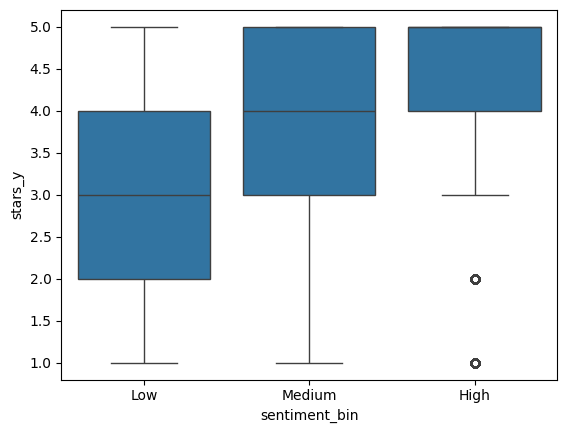

In [ ]:
import seaborn as sns
df_New_Orleans_business_reviews['sentiment_bin'] = pd.cut(df_New_Orleans_business_reviews['sentiment'], bins=[0, 0.3, 0.7, 1.0], labels=['Low', 'Medium', 'High'])
sns.boxplot(data=df_New_Orleans_business_reviews, x='sentiment_bin', y='stars_y')

In [ ]:
df_New_Orleans_business_reviews[['sentiment', 'stars_y']].corr()

,sentiment,stars_y
sentiment,1.000000,0.546097
stars_y,0.546097,1.000000


In [ ]:
df_New_Orleans_business_reviews['topic'].value_counts()

,count
topic,
3,3445
2,3176
0,2593
4,1850
1,1498


Topic vs Sentiment vs Review Stars

In [ ]:
df_comparative_analysis = df_New_Orleans_business_reviews[['text', 'topic', 'sentiment', 'stars_y']]
df_comparative_analysis.head(3)

,text,topic,sentiment,stars_y
0,We went here last night for our first dinner i...,0,0.9915,5.0
1,"""Amazing BBQ Shrimp""\nReviewed November 21, 20...",0,0.9042,4.0
2,I am unsure how to rate Mr. B's. We had an 8p...,0,0.9398,3.0


In [ ]:
topic_summary = df_New_Orleans_business_reviews.groupby('topic').agg({
    'sentiment': 'mean',
    'stars_y': 'mean',
    'text': 'count'  # Optional: number of reviews per topic
}).reset_index()
topic_summary

,topic,sentiment,stars_y,text
0,0,0.866191,4.483995,2593
1,1,0.778293,4.426569,1498
2,2,0.504493,3.084383,3176
3,3,0.858569,4.606676,3445
4,4,0.827084,4.401622,1850


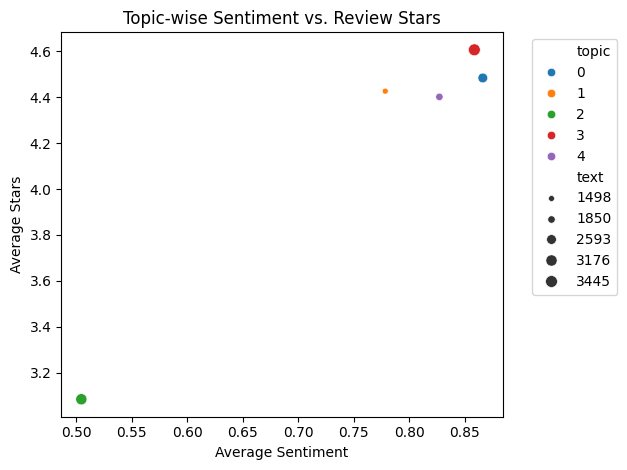

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=topic_summary, x='sentiment', y='stars_y', size='text', hue='topic', palette='tab10')
plt.title('Topic-wise Sentiment vs. Review Stars')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Stars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Label Topics from Keywords

In [ ]:
# Assuming lda_model is your trained model
def get_topic_keywords(lda_model, feature_names, n_top_words=10):
    topic_keywords = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_keywords[topic_idx] = top_words
    return topic_keywords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df_New_Orleans_business_reviews['text'])
feature_names = vectorizer.get_feature_names_out()

topic_keywords = get_topic_keywords(lda, feature_names)

NameError: name 'lda' is not defined

In [ ]:
#Assign labels based on keywords
for topic_id, keywords in topic_keywords.items():
    print(f"Topic {topic_id}: {', '.join(keywords)}")

In [ ]:
#Map labels
topic_labels = {
    0: 'Service',
    1: 'Food',
    2: 'Pricing',
    3: 'Ambience',
    4: 'Location'
}
df['topic_label'] = df['topic'].map(topic_labels)

In [ ]:
def suggest_label(keywords):
    if 'food' in keywords or 'dish' in keywords:
        return 'Food'
    elif 'price' in keywords or 'value' in keywords:
        return 'Pricing'
    elif 'staff' in keywords or 'service' in keywords:
        return 'Service'
    elif 'decor' in keywords or 'ambience' in keywords:
        return 'Ambience'
    else:
        return 'Other'

In [ ]:
df_New_Orleans_business_reviews['sentiment'].value_counts()

,count
sentiment,
0.0000,65
0.9715,25
0.9890,25
0.9904,25
0.9915,24
...,...
0.6029,1
0.7234,1
0.1007,1


In [ ]:
#Download dataframe into csv file
df_New_Orleans_business_reviews.to_csv('New_Orleans_business_reviews.csv', index=False)

###Detecting Subjectivity and Emotion in reviews

In [ ]:
!pip install textblob
!pip install git+https://github.com/metalcorebear/NRCLex.git

  Cloning https://github.com/metalcorebear/NRCLex.git to /tmp/pip-req-build-6kdksye8
  Running command git clone --filter=blob:none --quiet https://github.com/metalcorebear/NRCLex.git /tmp/pip-req-build-6kdksye8
  Resolved https://github.com/metalcorebear/NRCLex.git to commit a8be2a21dba271832240f91966554eebd10c8c74
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement collections (from nrclex) (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
from textblob import TextBlob
from nrclex import NRCLex

# Function to extract subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity  # Range: 0 (objective) to 1 (subjective)

# Function to extract dominant emotion
def get_dominant_emotion(text):
    emotions = NRCLex(text).top_emotions
    return emotions[0][0] if emotions else 'neutral'

# Optional: Get full emotion distribution
def get_emotion_scores(text):
    return NRCLex(text).raw_emotion_scores

ModuleNotFoundError: No module named 'nrclex'

In [ ]:
df_New_Orleans_business_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12562 entries, 1813 to 41262
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       12562 non-null  object 
 1   name              12562 non-null  object 
 2   address           12562 non-null  object 
 3   city              12562 non-null  object 
 4   state             12562 non-null  object 
 5   postal_code       12562 non-null  object 
 6   latitude          12562 non-null  float64
 7   longitude         12562 non-null  float64
 8   stars_x           12562 non-null  float64
 9   review_count      12562 non-null  int64  
 10  is_open           12562 non-null  int64  
 11  attributes        12562 non-null  object 
 12  categories        12562 non-null  object 
 13  hours             12562 non-null  object 
 14  split_categories  12562 non-null  object 
 15  primary_category  12562 non-null  object 
 16  review_id         12562 non-null  object 
